Por favor, sube tu archivo Excel:


Saving Bloomberg.xlsx to Bloomberg (5).xlsx

Hojas disponibles en tu Excel: ['Apple 3min', 'Apple 30min', 'Nvidia 3min', 'Nvidia 30min', 'Microsoft 3min', 'Microsoft 30min']

=== Análisis para Apple 3min ===

Prueba ADF para Apple 3min:
Estadístico ADF: -1.9450135158157167
p-valor: 0.31119042321566104
Valores críticos: {'1%': -3.4450642060791097, '5%': -2.868027634065253, '10%': -2.5702256691640515}
Apple 3min no es estacionaria, se aplicó diferenciación


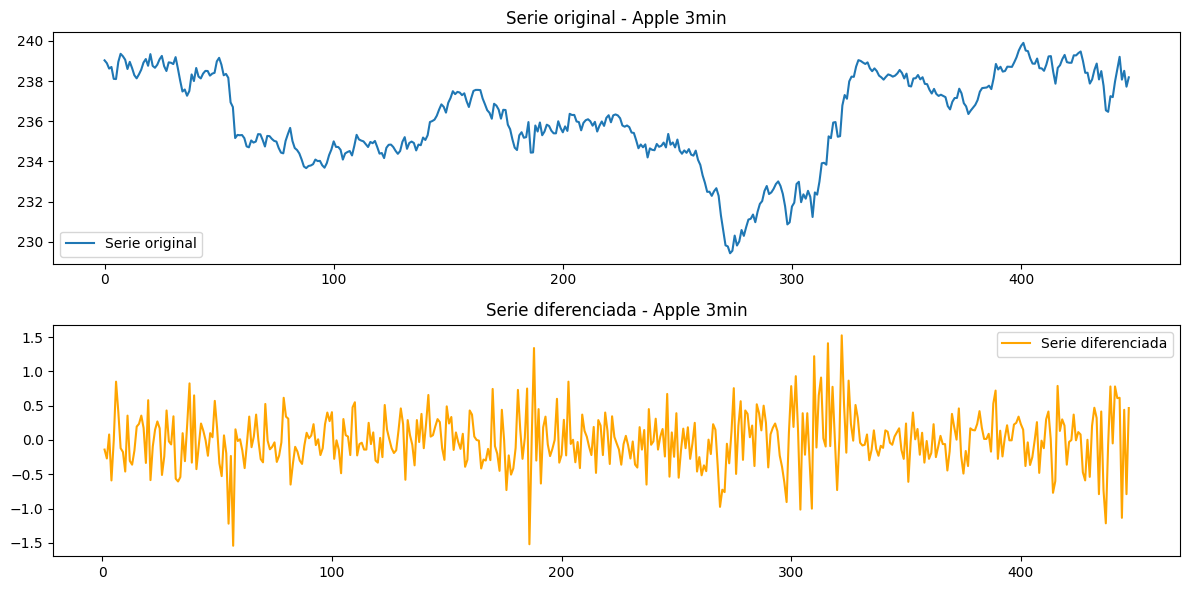


Mejor modelo ARMA para Apple 3min:
Orden: (2, 0, 2)
AIC: 443.9514601359256


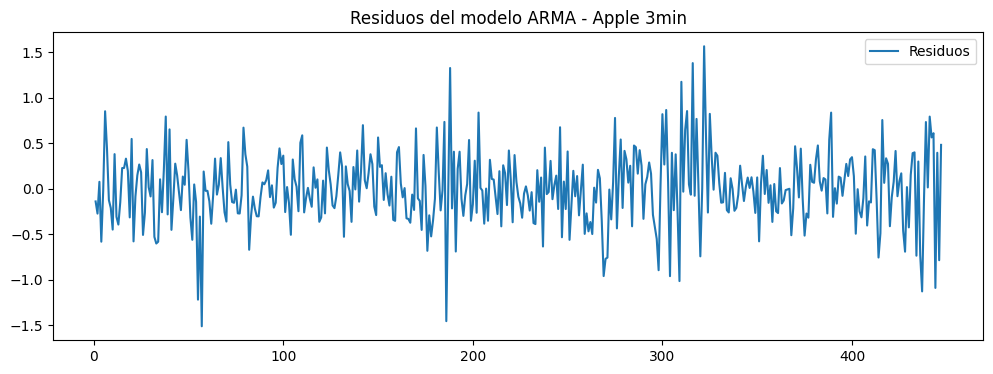


=== Análisis para Apple 30min ===

Prueba ADF para Apple 30min:
Estadístico ADF: -1.2664082346242111
p-valor: 0.6443970965471273
Valores críticos: {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}
Apple 30min no es estacionaria, se aplicó diferenciación


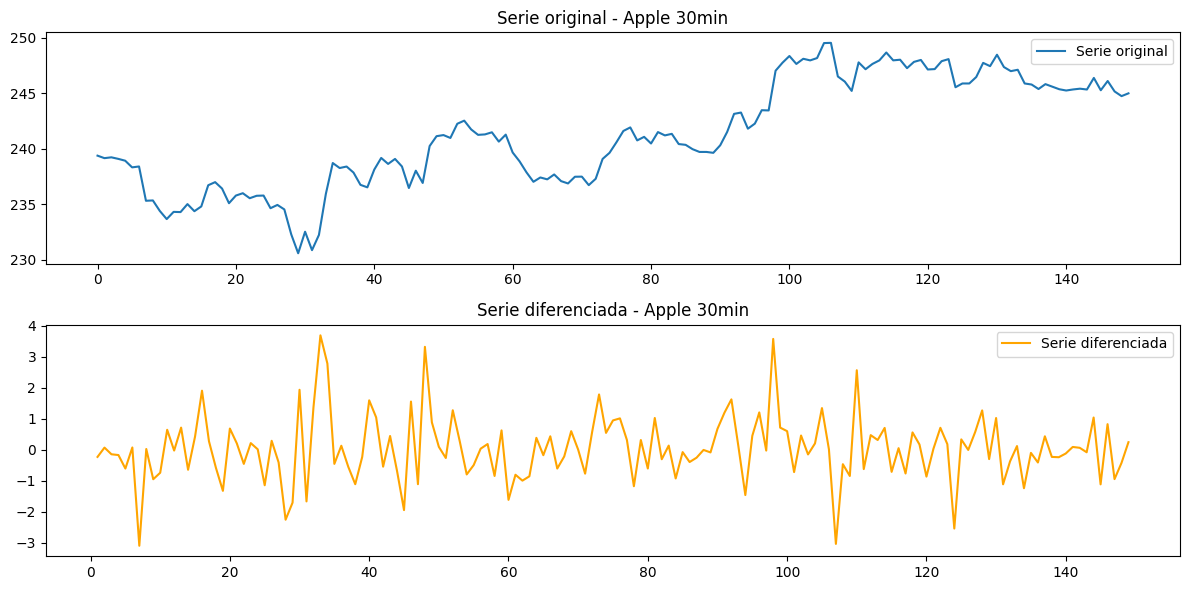


Mejor modelo ARMA para Apple 30min:
Orden: (2, 0, 2)
AIC: 439.52861875163944


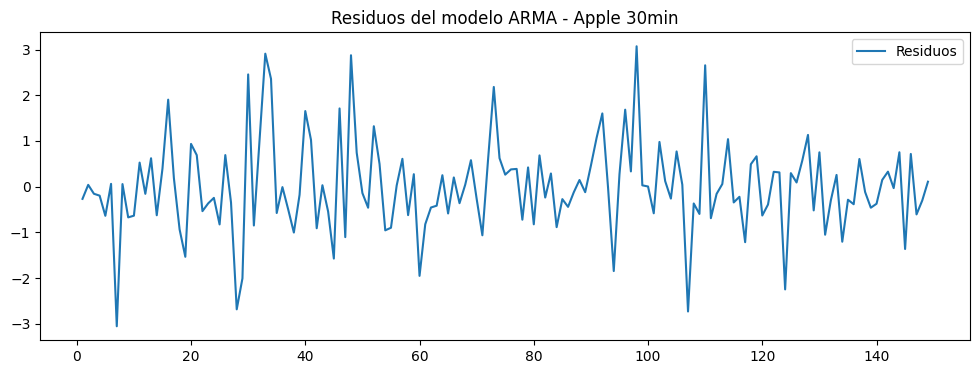


=== Análisis para Nvidia 3min ===

Prueba ADF para Nvidia 3min:
Estadístico ADF: -2.1727073650003255
p-valor: 0.21629978122996651
Valores críticos: {'1%': -3.4450311708077743, '5%': -2.8680131035505023, '10%': -2.570217924306441}
Nvidia 3min no es estacionaria, se aplicó diferenciación


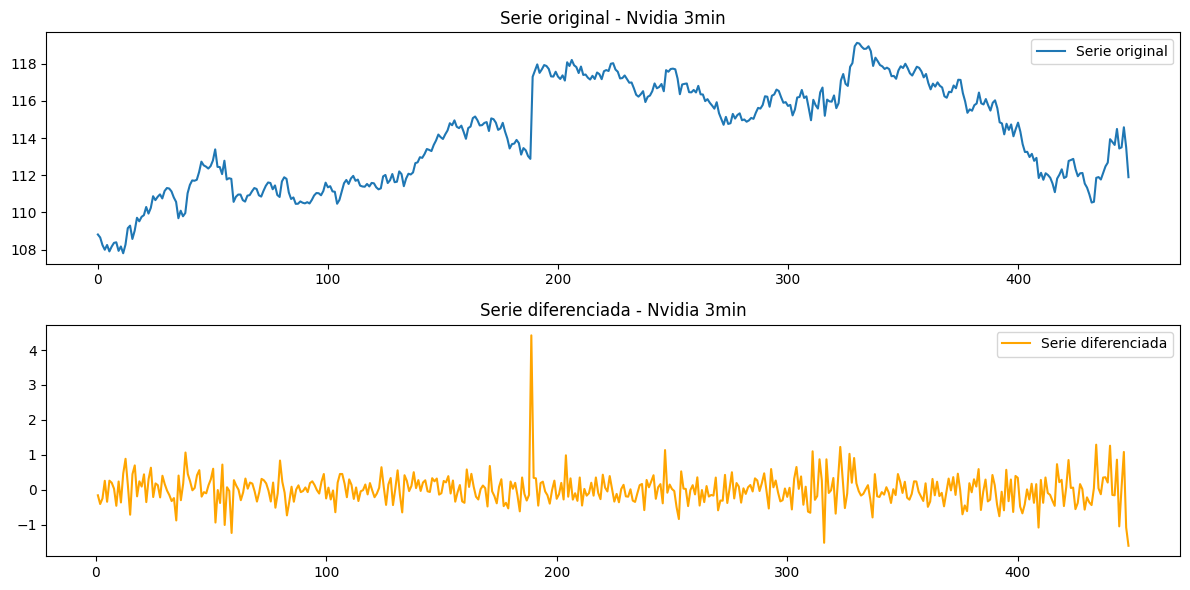


Mejor modelo ARMA para Nvidia 3min:
Orden: (2, 0, 0)
AIC: 553.4312251604774


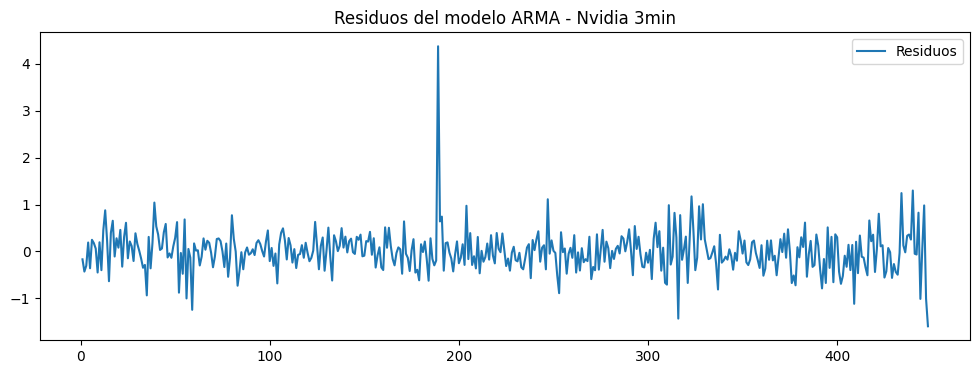


=== Análisis para Nvidia 30min ===

Prueba ADF para Nvidia 30min:
Estadístico ADF: -1.034390055848942
p-valor: 0.7405156366666958
Valores críticos: {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}
Nvidia 30min no es estacionaria, se aplicó diferenciación


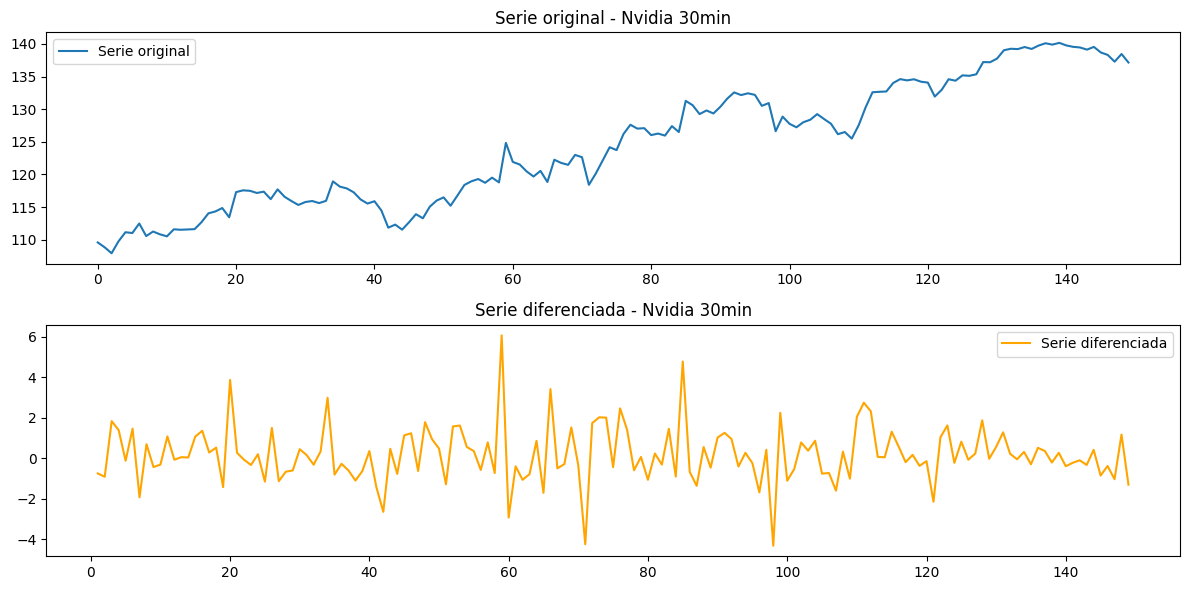


Mejor modelo ARMA para Nvidia 30min:
Orden: (1, 0, 3)
AIC: 518.1739693523652


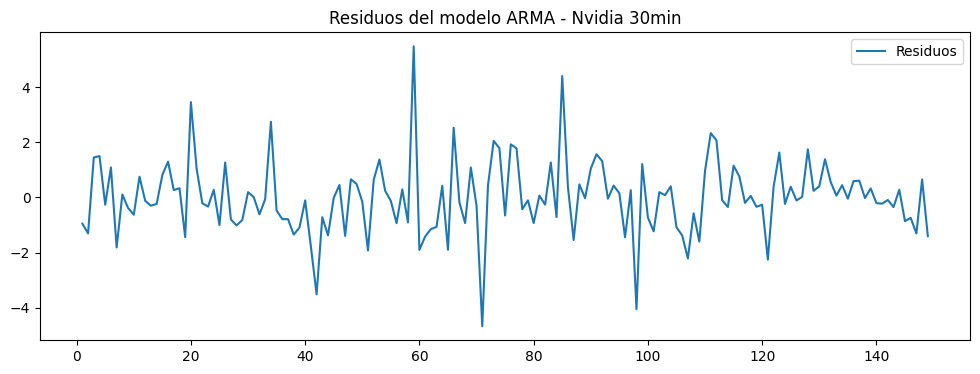


=== Análisis para Microsoft 3min ===

Prueba ADF para Microsoft 3min:
Estadístico ADF: -0.6363303785347485
p-valor: 0.8625597559748365
Valores críticos: {'1%': -3.444965543297668, '5%': -2.8679842369272976, '10%': -2.5702025382716047}
Microsoft 3min no es estacionaria, se aplicó diferenciación


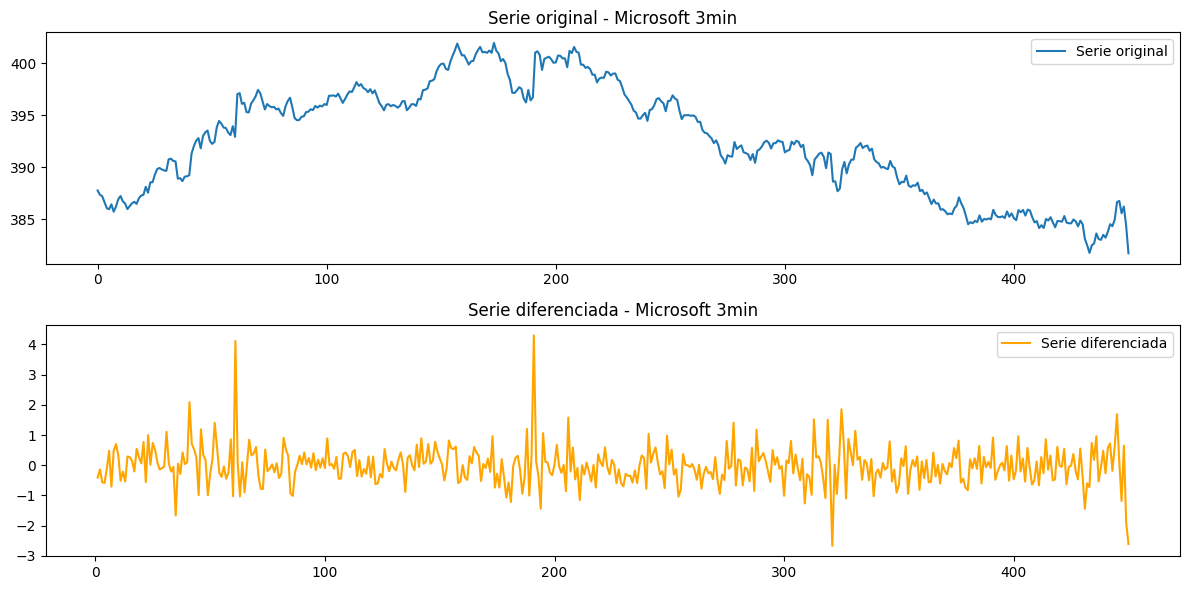


Mejor modelo ARMA para Microsoft 3min:
Orden: (2, 0, 2)
AIC: 879.5202218818745


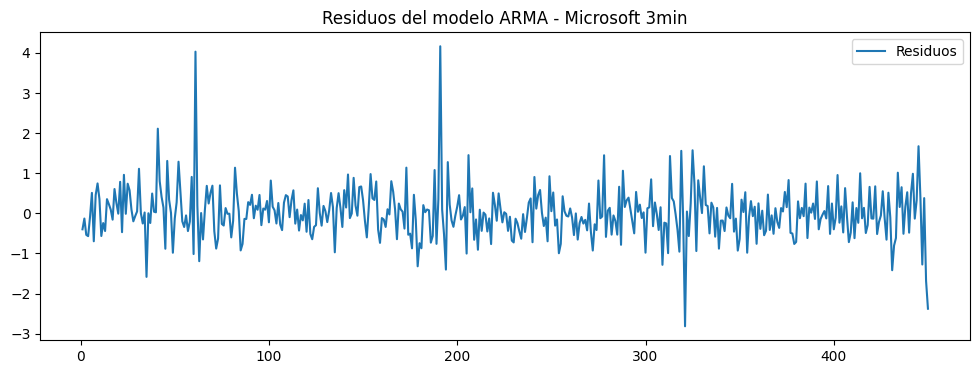


=== Análisis para Microsoft 30min ===

Prueba ADF para Microsoft 30min:
Estadístico ADF: -0.8622248440603124
p-valor: 0.8001577328914955
Valores críticos: {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}
Microsoft 30min no es estacionaria, se aplicó diferenciación


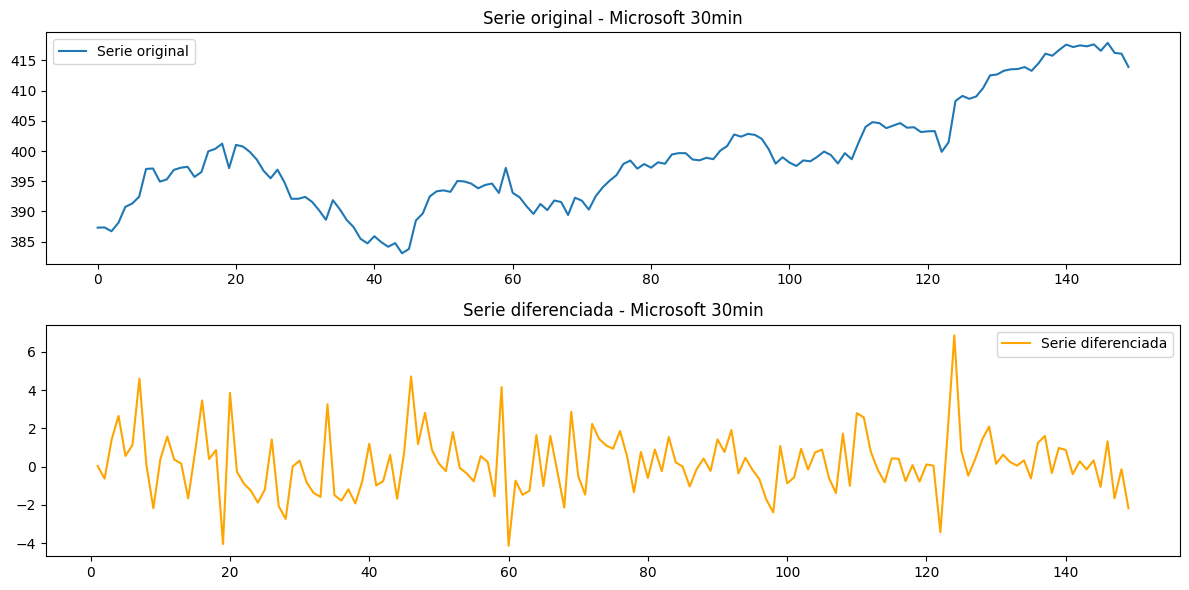


Mejor modelo ARMA para Microsoft 30min:
Orden: (0, 0, 0)
AIC: 569.0978875016075


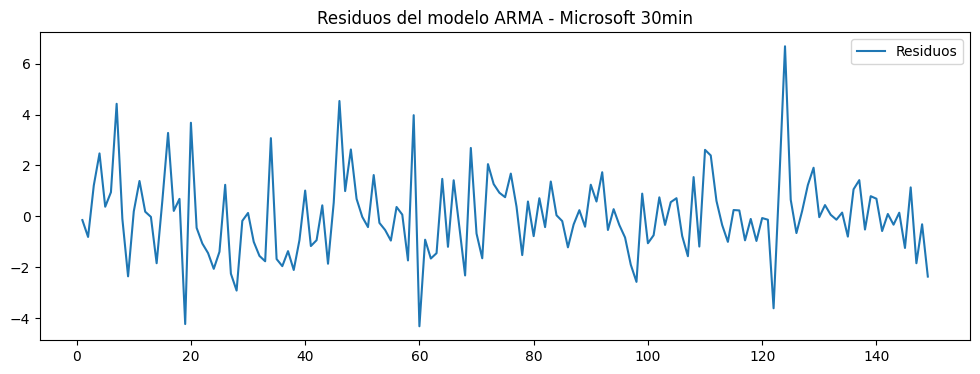


Prueba de cointegración entre Apple 3min y Nvidia 3min:
p-valor: 0.5140034782144458

Prueba de cointegración entre Apple 30min y Nvidia 30min:
p-valor: 0.2976845526417313

Prueba de cointegración entre Apple 3min y Microsoft 3min:
p-valor: 0.39758048755000386

Prueba de cointegración entre Apple 30min y Microsoft 30min:
p-valor: 0.6104962451355802

Prueba de cointegración entre Nvidia 3min y Microsoft 3min:
p-valor: 0.4950691731757528

Prueba de cointegración entre Nvidia 30min y Microsoft 30min:
p-valor: 0.6418409212568502


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
import io
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

def load_data(file_content):
    excel_file = pd.ExcelFile(io.BytesIO(file_content))
    sheets = excel_file.sheet_names
    print("\nHojas disponibles en tu Excel:", sheets)

    target_sheets = ['Apple 3min', 'Apple 30min', 'Nvidia 3min', 'Nvidia 30min', 'Microsoft 3min', 'Microsoft 30min']
    data = {}
    for sheet in target_sheets:
        if sheet in sheets:
            df = excel_file.parse(sheet)
            if 'Precio' in df.columns:
                data[sheet] = df['Precio']
            else:
                print(f"¡Advertencia! La hoja '{sheet}' no tiene una columna 'Precio'.")
        else:
            print(f"¡Advertencia! La hoja '{sheet}' no existe en el Excel.")
    return data

def unit_root_test(series, name):
    result = adfuller(series.dropna())
    print(f'\nPrueba ADF para {name}:')
    print(f'Estadístico ADF: {result[0]}')
    print(f'p-valor: {result[1]}')
    print(f'Valores críticos: {result[4]}')
    return result[1] < 0.05

def fit_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None
    best_model = None

    series = series.dropna()
    stationary = unit_root_test(series, name)
    if not stationary:
        series_diff = series.diff().dropna()
        print(f'{name} no es estacionaria, se aplicó diferenciación')
    else:
        series_diff = series

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(series, label='Serie original')
    plt.title(f'Serie original - {name}')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(series_diff, label='Serie diferenciada', color='orange')
    plt.title(f'Serie diferenciada - {name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series_diff, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
                    best_model = results
            except:
                continue

    print(f'\nMejor modelo ARMA para {name}:')
    print(f'Orden: {best_order}')
    print(f'AIC: {best_aic}')

    plt.figure(figsize=(12, 4))
    plt.plot(best_model.resid, label='Residuos')
    plt.title(f'Residuos del modelo ARMA - {name}')
    plt.legend()
    plt.show()

    return best_model

def cointegration_test(series1, series2, name1, name2):
    series1, series2 = series1.align(series2, join='inner')
    score, p_value, _ = coint(series1.dropna(), series2.dropna())
    print(f'\nPrueba de cointegración entre {name1} y {name2}:')
    print(f'p-valor: {p_value}')
    return p_value < 0.05

def main():
    print("Por favor, sube tu archivo Excel:")
    uploaded = files.upload()

    file_name = list(uploaded.keys())[0]
    file_content = uploaded[file_name]
    data = load_data(file_content)

    stocks = ['Apple', 'Nvidia', 'Microsoft']
    timeframes = ['3min', '30min']

    results = {}

    for sheet, series in data.items():
        print(f'\n=== Análisis para {sheet} ===')
        model = fit_arma(series, sheet)
        results[sheet] = model

    for i, stock1 in enumerate(stocks):
        for stock2 in stocks[i+1:]:
            for timeframe in timeframes:
                series1 = data.get(f'{stock1} {timeframe}')
                series2 = data.get(f'{stock2} {timeframe}')
                if series1 is not None and series2 is not None:
                    cointegration_test(series1, series2,
                                     f'{stock1} {timeframe}',
                                     f'{stock2} {timeframe}')

if __name__ == "__main__":
    main()

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")